In [1]:
import gpu_tracking
import tifffile
import trackpy as tp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vid = tifffile.imread("../emily_tracking/sample_vids/s_20.tif").astype("float32")

In [11]:
gpu_tracking.batch(vid, 9)

[src/execute_gpu.rs:439] wait_gpu_time = 1.9940342


array([[   0.      ,  724.9097  ,   13.730005,   12.079997],
       [   0.      , 1203.8597  ,   28.821108,   23.363684],
       [   0.      ,  692.0936  ,   38.516895,   12.261294],
       ...,
       [1999.      ,  513.3966  ,  485.676   ,  491.09454 ],
       [1999.      ,  831.9878  ,  469.97037 ,  494.83466 ],
       [1999.      ,  546.8115  ,  494.77097 ,  501.28033 ]],
      dtype=float32)

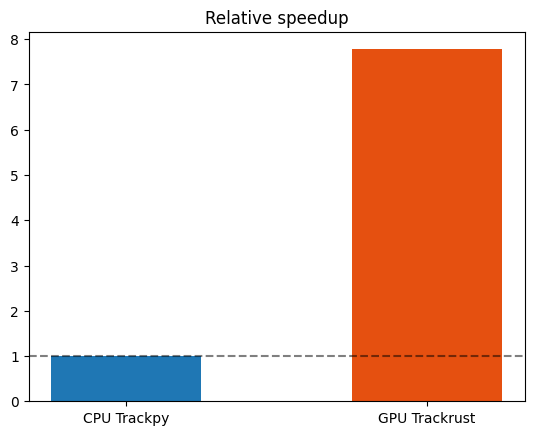

In [42]:
# plt.bar([0, 1], [35, 4.5], width = 0.5)
plt.bar([0], [1], width = 0.5)
plt.bar([1], [35/4.5], width = 0.5, color = "#e55010")
# plt.yticks([])
plt.xticks([0,1], labels = ["CPU Trackpy", "GPU Trackrust"])
xlim = plt.gca().get_xlim()
plt.hlines(1, *xlim, colors = "k", linestyles="--", alpha = [0.5])
plt.gca().set_xlim(*xlim)
plt.title("Relative speedup")
# plt.xlim()
plt.savefig("speedup.png")

In [8]:
coords = lambda df: df[["y", "x"]].to_numpy().T
diameter = 9
minmass = 0
separation = 10
filter_close = True
my_df = pd.DataFrame(gpu_tracking.batch(vid[:1], diameter, minmass = minmass, separation = separation, filter_close = filter_close), columns = ["frame", "mass", "y", "x"])
my_df = my_df.astype({"frame": int})[["frame", "y", "x", "mass"]]

tp.quiet()
tp_df = tp.batch(vid[:1], diameter, threshold = 1/255, percentile = 0, minmass = minmass, characterize = False, separation = separation)


[src/execute_gpu.rs:439] wait_gpu_time = 0.0


In [9]:
gpu_tracking.batch(vid[:1], diameter, filter_close = True).shape

[src/execute_gpu.rs:439] wait_gpu_time = 0.0


(875, 4)

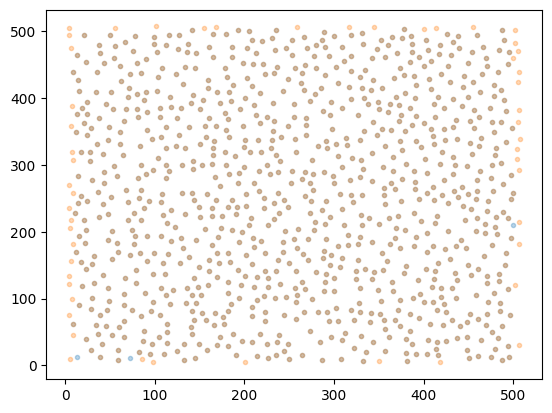

In [10]:
plt.plot(*coords(my_df), "C0.", alpha = 0.3)
plt.plot(*coords(tp_df), "C1.", alpha = 0.3)

In [5]:
my_df[my_df["frame"] == 0]

,frame,y,x,mass
0,0,13.730005,12.079997,724.909729
1,0,28.821108,23.363684,1203.859741
2,0,38.516895,12.261294,692.093628
3,0,41.565838,31.732403,712.716980
4,0,23.329374,39.771408,717.008118
...,...,...,...,...
904,0,494.345947,450.933838,777.958069
905,0,494.763519,469.818237,677.510498
906,0,484.360779,472.538147,738.328430
907,0,487.305145,501.787170,719.308350


In [6]:
tp_df[tp_df["frame"] == 0]

,y,x,mass,frame
0,4.215499,74.683652,1037.041907,0
1,4.600000,270.109091,726.589871,0
2,4.206278,280.707025,736.497915,0
3,4.515483,410.471767,604.390666,0
4,4.617257,494.506637,995.207945,0
...,...,...,...,...
924,506.169284,181.959860,630.812116,0
925,506.290404,214.916667,435.953923,0
926,507.021053,339.286316,522.924529,0
927,506.582677,381.733858,699.067528,0
